### Number of Nurses

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import MinMaxScaler

### Load Data

In [2]:
df = pd.read_csv('../3/1.csv')
df

,_id,ปี,เขตสุขภาพ,จังหวัด,จำนวน
0,1,2567,เขตสุขภาพที่ 13,กรุงเทพมหานคร,41766
1,2,2567,เขตสุขภาพที่ 1,เชียงราย,3142
2,3,2567,เขตสุขภาพที่ 1,เชียงใหม่,6851
3,4,2567,เขตสุขภาพที่ 1,น่าน,1425
4,5,2567,เขตสุขภาพที่ 1,พะเยา,1329
...,...,...,...,...,...
1073,1074,2554,เขตสุขภาพที่ 12,นราธิวาส,1194
1074,1075,2554,เขตสุขภาพที่ 12,ปัตตานี,861
1075,1076,2554,เขตสุขภาพที่ 12,ยะลา,1349
1076,1077,2554,เขตสุขภาพที่ 12,สงขลา,4006


### Data Cleaning

In [3]:
df = df.drop(columns=['_id'])
df

,ปี,เขตสุขภาพ,จังหวัด,จำนวน
0,2567,เขตสุขภาพที่ 13,กรุงเทพมหานคร,41766
1,2567,เขตสุขภาพที่ 1,เชียงราย,3142
2,2567,เขตสุขภาพที่ 1,เชียงใหม่,6851
3,2567,เขตสุขภาพที่ 1,น่าน,1425
4,2567,เขตสุขภาพที่ 1,พะเยา,1329
...,...,...,...,...
1073,2554,เขตสุขภาพที่ 12,นราธิวาส,1194
1074,2554,เขตสุขภาพที่ 12,ปัตตานี,861
1075,2554,เขตสุขภาพที่ 12,ยะลา,1349
1076,2554,เขตสุขภาพที่ 12,สงขลา,4006


In [4]:
columns_mapping = {'ปี':'Year', 'เขตสุขภาพ':'Health Region', 'จังหวัด':'Province', 'จำนวน':'total'}
df.rename(columns=columns_mapping, inplace=True)
df

,Year,Health Region,Province,total
0,2567,เขตสุขภาพที่ 13,กรุงเทพมหานคร,41766
1,2567,เขตสุขภาพที่ 1,เชียงราย,3142
2,2567,เขตสุขภาพที่ 1,เชียงใหม่,6851
3,2567,เขตสุขภาพที่ 1,น่าน,1425
4,2567,เขตสุขภาพที่ 1,พะเยา,1329
...,...,...,...,...
1073,2554,เขตสุขภาพที่ 12,นราธิวาส,1194
1074,2554,เขตสุขภาพที่ 12,ปัตตานี,861
1075,2554,เขตสุขภาพที่ 12,ยะลา,1349
1076,2554,เขตสุขภาพที่ 12,สงขลา,4006


In [5]:
df['Year'].unique()

array([2567, 2566, 2565, 2564, 2563, 2562, 2561, 2560, 2559, 2558, 2557,
       2556, 2555, 2554], dtype=int64)

In [6]:
df['Health Region'].unique()

array(['เขตสุขภาพที่ 13', 'เขตสุขภาพที่ 1', 'เขตสุขภาพที่ 2',
       'เขตสุขภาพที่ 3', 'เขตสุขภาพที่ 4', 'เขตสุขภาพที่ 5',
       'เขตสุขภาพที่ 6', 'เขตสุขภาพที่ 7', 'เขตสุขภาพที่ 8',
       'เขตสุขภาพที่ 9', 'เขตสุขภาพที่ 10', 'เขตสุขภาพที่ 11',
       'เขตสุขภาพที่ 12'], dtype=object)

In [7]:
print(df['Province'].unique())
print('count :', len(df['Province'].unique()))

['กรุงเทพมหานคร' 'เชียงราย' 'เชียงใหม่' 'น่าน' 'พะเยา' 'แพร่' 'แม่ฮ่องสอน'
 'ลำปาง' 'ลำพูน' 'ตาก' 'พิษณุโลก' 'เพชรบูรณ์' 'สุโขทัย' 'อุตรดิตถ์'
 'กำแพงเพชร' 'ชัยนาท' 'นครสวรรค์' 'พิจิตร' 'อุทัยธานี' 'นครนายก' 'นนทบุรี'
 'ปทุมธานี' 'พระนครศรีอยุธยา' 'ลพบุรี' 'สระบุรี' 'สิงห์บุรี' 'อ่างทอง'
 'กาญจนบุรี' 'นครปฐม' 'ประจวบคีรีขันธ์' 'เพชรบุรี' 'ราชบุรี' 'สมุทรสงคราม'
 'สมุทรสาคร' 'สุพรรณบุรี' 'จันทบุรี' 'ฉะเชิงเทรา' 'ชลบุรี' 'ตราด'
 'ปราจีนบุรี' 'ระยอง' 'สมุทรปราการ' 'สระแก้ว' 'กาฬสินธุ์' 'ขอนแก่น'
 'มหาสารคาม' 'ร้อยเอ็ด' 'นครพนม' 'บึงกาฬ' 'เลย' 'สกลนคร' 'หนองคาย'
 'หนองบัวลำภู' 'อุดรธานี' 'ชัยภูมิ' 'นครราชสีมา' 'บุรีรัมย์' 'สุรินทร์'
 'มุกดาหาร' 'ยโสธร' 'ศรีสะเกษ' 'อำนาจเจริญ' 'อุบลราชธานี' 'กระบี่' 'ชุมพร'
 'นครศรีธรรมราช' 'พังงา' 'ภูเก็ต' 'ระนอง' 'สุราษฎร์ธานี' 'ตรัง' 'นราธิวาส'
 'ปัตตานี' 'พัทลุง' 'ยะลา' 'สงขลา' 'สตูล']
count : 77


In [8]:
hr_mapping = {'เขตสุขภาพที่ 13':13, 'เขตสุขภาพที่ 1':1, 'เขตสุขภาพที่ 2':2,
       'เขตสุขภาพที่ 3':3, 'เขตสุขภาพที่ 4':4, 'เขตสุขภาพที่ 5':5,
       'เขตสุขภาพที่ 6':6, 'เขตสุขภาพที่ 7':7, 'เขตสุขภาพที่ 8':8,
       'เขตสุขภาพที่ 9':9, 'เขตสุขภาพที่ 10':10, 'เขตสุขภาพที่ 11':11,
       'เขตสุขภาพที่ 12':12}

df['Health Region'] = df['Health Region'].replace(hr_mapping)
df

C:\Users\araya\AppData\Local\Temp\ipykernel_23600\1607149806.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Health Region'] = df['Health Region'].replace(hr_mapping)


,Year,Health Region,Province,total
0,2567,13,กรุงเทพมหานคร,41766
1,2567,1,เชียงราย,3142
2,2567,1,เชียงใหม่,6851
3,2567,1,น่าน,1425
4,2567,1,พะเยา,1329
...,...,...,...,...
1073,2554,12,นราธิวาส,1194
1074,2554,12,ปัตตานี,861
1075,2554,12,ยะลา,1349
1076,2554,12,สงขลา,4006


In [9]:
df['Province'].unique()

array(['กรุงเทพมหานคร', 'เชียงราย', 'เชียงใหม่', 'น่าน', 'พะเยา', 'แพร่',
       'แม่ฮ่องสอน', 'ลำปาง', 'ลำพูน', 'ตาก', 'พิษณุโลก', 'เพชรบูรณ์',
       'สุโขทัย', 'อุตรดิตถ์', 'กำแพงเพชร', 'ชัยนาท', 'นครสวรรค์',
       'พิจิตร', 'อุทัยธานี', 'นครนายก', 'นนทบุรี', 'ปทุมธานี',
       'พระนครศรีอยุธยา', 'ลพบุรี', 'สระบุรี', 'สิงห์บุรี', 'อ่างทอง',
       'กาญจนบุรี', 'นครปฐม', 'ประจวบคีรีขันธ์', 'เพชรบุรี', 'ราชบุรี',
       'สมุทรสงคราม', 'สมุทรสาคร', 'สุพรรณบุรี', 'จันทบุรี', 'ฉะเชิงเทรา',
       'ชลบุรี', 'ตราด', 'ปราจีนบุรี', 'ระยอง', 'สมุทรปราการ', 'สระแก้ว',
       'กาฬสินธุ์', 'ขอนแก่น', 'มหาสารคาม', 'ร้อยเอ็ด', 'นครพนม',
       'บึงกาฬ', 'เลย', 'สกลนคร', 'หนองคาย', 'หนองบัวลำภู', 'อุดรธานี',
       'ชัยภูมิ', 'นครราชสีมา', 'บุรีรัมย์', 'สุรินทร์', 'มุกดาหาร',
       'ยโสธร', 'ศรีสะเกษ', 'อำนาจเจริญ', 'อุบลราชธานี', 'กระบี่',
       'ชุมพร', 'นครศรีธรรมราช', 'พังงา', 'ภูเก็ต', 'ระนอง',
       'สุราษฎร์ธานี', 'ตรัง', 'นราธิวาส', 'ปัตตานี', 'พัทลุง', 'ยะลา',
       'สงขลา', 'สตูล'], 

In [10]:
import pythainlp
from pythainlp.transliterate import romanize

def Th2En(provinces):
    province_lst = {province:romanize(province, engine='tltk') for province in provinces}
    return province_lst

province_mapping = Th2En(df['Province'].unique())
df['Province'] = df['Province'].replace(province_mapping)
df

,Year,Health Region,Province,total
0,2567,13,krungthepmahanakhon,41766
1,2567,1,chiangrai,3142
2,2567,1,chiangmai,6851
3,2567,1,nan,1425
4,2567,1,phayao,1329
...,...,...,...,...
1073,2554,12,narathiwat,1194
1074,2554,12,pattani,861
1075,2554,12,yala,1349
1076,2554,12,songkhla,4006


### Group Data   
We will seperate dataframe to sub-dataframe to visualization.   
<!-- - Year, total
- Health Region, total
- Province, total -->
- Year, Health Region, total
- Year, Province, total


In [11]:
df_year_hr = df.groupby(['Year', 'Health Region'])['total'].sum().reset_index()
df_year_hr

,Year,Health Region,total
0,2554,1,13345
1,2554,2,6150
2,2554,3,4745
3,2554,4,10539
4,2554,5,9956
...,...,...,...
177,2567,9,14751
178,2567,10,10221
179,2567,11,12184
180,2567,12,14078


In [12]:
df_year_hr.loc[(df_year_hr['Year']==2554) & (df_year_hr['Health Region']==10)]

,Year,Health Region,total
9,2554,10,6852


In [13]:
df_year_province = df.groupby(['Year', 'Province'])['total'].sum().reset_index()
df_year_province

,Year,Province,total
0,2554,amnatcharoen,526
1,2554,angthong,644
2,2554,buengkan,435
3,2554,buriram,1900
4,2554,chachoengthrao,1081
...,...,...,...
1073,2567,udonthani,3519
1074,2567,uthaithani,755
1075,2567,utradit,1337
1076,2567,yala,1610


In [14]:
df_year_province[df_year_province['Year'] == 2567]

,Year,Province,total
1001,2567,amnatcharoen,705
1002,2567,angthong,712
1003,2567,buengkan,730
1004,2567,buriram,3140
1005,2567,chachoengthrao,1818
...,...,...,...
1073,2567,udonthani,3519
1074,2567,uthaithani,755
1075,2567,utradit,1337
1076,2567,yala,1610


In [15]:
df_year_province.loc[(df_year_province['Year']==2554) & (df_year_province['Province']=='yala')]

,Year,Province,total
75,2554,yala,1349


### Visualization

In [16]:
df_year_hr

,Year,Health Region,total
0,2554,1,13345
1,2554,2,6150
2,2554,3,4745
3,2554,4,10539
4,2554,5,9956
...,...,...,...
177,2567,9,14751
178,2567,10,10221
179,2567,11,12184
180,2567,12,14078


In [17]:
df_year_total = df_year_hr.groupby(['Year'])['total'].sum().reset_index()
df_year_total

,Year,total
0,2554,127516
1,2555,127583
2,2556,131349
3,2557,149913
4,2558,149046
5,2559,153512
6,2560,160889
7,2561,165489
8,2562,172937
9,2563,176235


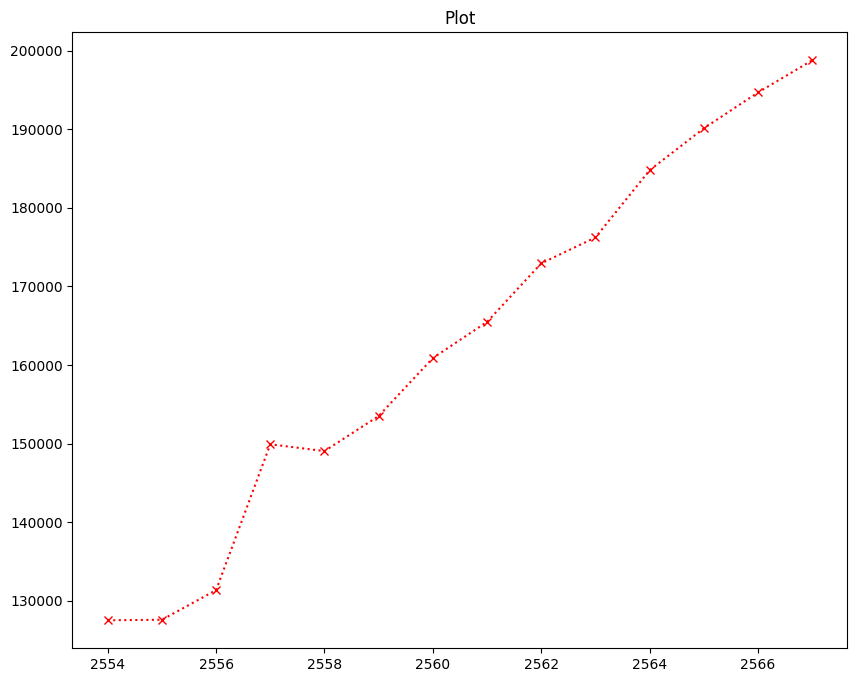

In [18]:
# จำนวนพยาบาลทุกเขตในแต่ละปี
plt.figure(figsize=(10, 8))
plt.title('Plot')
# sns.barplot(df_year_hr, x='Health Region', y='total', hue='Year')
plt.plot(df_year_total['Year'], df_year_total['total'], linestyle=':', marker='x', color='r')
plt.show()

In [19]:
df.loc[df['Health Region']==13]

,Year,Health Region,Province,total
0,2567,13,krungthepmahanakhon,41766
77,2566,13,krungthepmahanakhon,40206
154,2565,13,krungthepmahanakhon,37846
231,2564,13,krungthepmahanakhon,37678
308,2563,13,krungthepmahanakhon,37405
385,2562,13,krungthepmahanakhon,34825
462,2561,13,krungthepmahanakhon,33204
539,2560,13,krungthepmahanakhon,32497
616,2559,13,krungthepmahanakhon,28905
693,2558,13,krungthepmahanakhon,27558


In [20]:
# df.loc[df['Health Region']==1]['Province'].unique() # เขต 1
# df.loc[df['Health Region']==2]['Province'].unique() # เขต 2
# df.loc[df['Health Region']==3]['Province'].unique() # เขต 3
df.loc[df['Health Region']==4]['Province'].unique() # เขต 4
# df.loc[df['Health Region']==5]['Province'].unique() # เขต 5
# df.loc[df['Health Region']==6]['Province'].unique() # เขต 6
# df.loc[df['Health Region']==7]['Province'].unique() # เขต 7
# df.loc[df['Health Region']==8]['Province'].unique() # เขต 8
# df.loc[df['Health Region']==9]['Province'].unique() # เขต 9
# df.loc[df['Health Region']==10]['Province'].unique() # เขต 10
# df.loc[df['Health Region']==11]['Province'].unique() # เขต 11
# df.loc[df['Health Region']==12]['Province'].unique() # เขต 12
# df.loc[df['Health Region']==13]['Province'].unique() # เขต 13

array(['nakhonnayok', 'nonthaburi', 'pathumthani',
       'phranakhonsi-ayutthaya', 'lopburi', 'saraburi', 'singburi',
       'angthong'], dtype=object)

In [21]:
# import matplotlib.pyplot as plt
# import pandas as pd

# # pivot table
# heatmap_df = df.pivot_table(
#     index='Province',
#     columns='Year',
#     values='total',
#     aggfunc='sum'   # เผื่อมีข้อมูลซ้ำ
# )

# heatmap_df = heatmap_df.sort_index()

# # plot heatmap
# plt.figure(figsize=(12, 10))
# plt.imshow(heatmap_df, aspect='auto', interpolation='nearest')
# plt.colorbar(label='Total')

# plt.title('Heatmap of Total by Year and Province')
# plt.xlabel('Year')
# plt.ylabel('Province')

# # แสดง tick ให้ตรงกับข้อมูล
# plt.xticks(range(len(heatmap_df.columns)), heatmap_df.columns, rotation=45)
# plt.yticks(range(len(heatmap_df.index)), heatmap_df.index)

# plt.tight_layout()
# plt.show()


In [22]:
# import sys 
# !{sys.executable} -m pip install geodatasets

In [23]:
import geopandas as gpd
import geodatasets

chicago = gpd.read_file(geodatasets.get_path('geoda.chicago_commpop'))
groceries = gpd.read_file(geodatasets.get_path('geoda.groceries'))

In [24]:
chicago.head()

,community,NID,POP2010,POP2000,POPCH,POPPERCH,popplus,popneg,geometry
0,DOUGLAS,35,18238,26470,-8232,-31.099358,0,1,"MULTIPOLYGON (((-87.60914 41.84469, -87.60915 ..."
1,OAKLAND,36,5918,6110,-192,-3.142390,0,1,"MULTIPOLYGON (((-87.59215 41.81693, -87.59231 ..."
2,FULLER PARK,37,2876,3420,-544,-15.906433,0,1,"MULTIPOLYGON (((-87.6288 41.80189, -87.62879 4..."
3,GRAND BOULEVARD,38,21929,28006,-6077,-21.698922,0,1,"MULTIPOLYGON (((-87.60671 41.81681, -87.6067 4..."
4,KENWOOD,39,17841,18363,-522,-2.842673,0,1,"MULTIPOLYGON (((-87.59215 41.81693, -87.59215 ..."


<Axes: >

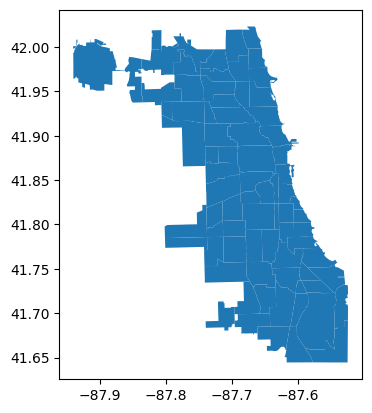

In [25]:
chicago.plot()

<Axes: >

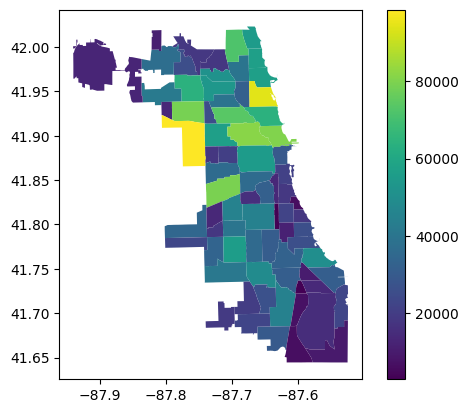

In [26]:
chicago.plot(column='POP2010', legend=True)

<Axes: >

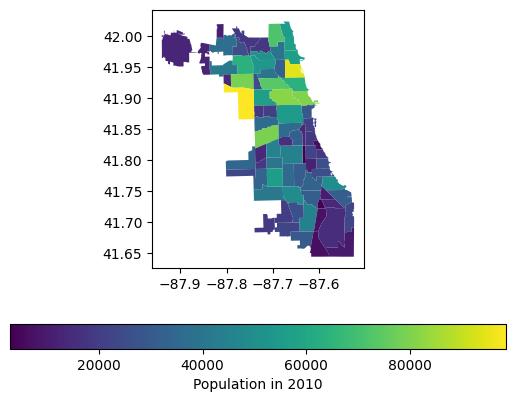

In [27]:
chicago.plot(column='POP2010', legend=True, legend_kwds={'label':'Population in 2010', 'orientation': 'horizontal'})

<Axes: >

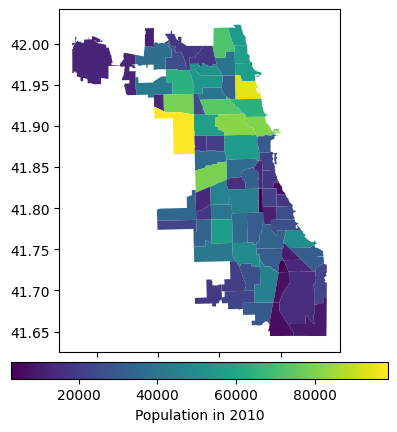

In [28]:
import matplotlib.pyplot as plt

from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = plt.subplots(1, 1)

divider = make_axes_locatable(ax)

cax = divider.append_axes("bottom", size="5%", pad=0.1)

chicago.plot(
    column="POP2010",
    ax=ax,
    legend=True,
    cax=cax,
    legend_kwds={"label": "Population in 2010", "orientation": "horizontal"},
)

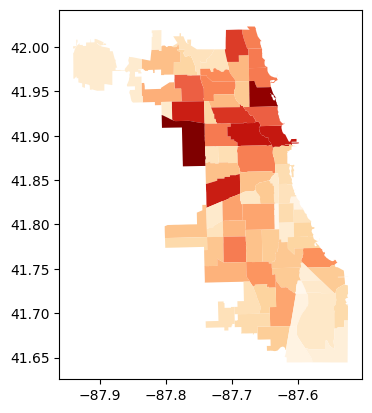

In [29]:
chicago.plot(column='POP2010', cmap='OrRd');

In [30]:
geodatasets.get_path

<function geodatasets.api.get_path(name)>

In [31]:
world = gpd.read_file('../3/provinces.geojson')

In [32]:
world.head()

,pro_code,pro_th,pro_en,reg_nesdb,reg_royin,perimeter,area_sqkm,geometry
0,56,พะเยา,Phayao,UpperNorth,North,442.838839,6189.635950,"MULTIPOLYGON (((100.27194 18.81875, 100.23968 ..."
1,57,เชียงราย,Chiang Rai,UpperNorth,North,668.416725,11583.012365,"MULTIPOLYGON (((99.53646 19.16314, 99.55039 19..."
2,54,แพร่,Phrae,UpperNorth,North,515.746817,6484.532497,"MULTIPOLYGON (((99.49711 17.77145, 99.48698 17..."
3,55,น่าน,Nan,UpperNorth,North,674.017891,12165.114094,"MULTIPOLYGON (((100.5524 18.03491, 100.55055 1..."
4,63,ตาก,Tak,LowwerNorth,West,1350.975407,17318.857031,"MULTIPOLYGON (((99.10549 16.0496, 99.08806 16...."


In [33]:
world['pro_en']

0           Phayao
1       Chiang Rai
2            Phrae
3              Nan
4              Tak
          ...     
72           Trang
73     Phatthalung
74        Songkhla
75    Mae Hong Son
76           Satun
Name: pro_en, Length: 77, dtype: object

In [34]:
for i, province in enumerate(world['pro_en']):
    # print(province.lower())
    world['pro_en'][i] = province.lower()

C:\Users\araya\AppData\Local\Temp\ipykernel_23600\514114781.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  world['pro_en'][i] = province.lower()


In [35]:
world

,pro_code,pro_th,pro_en,reg_nesdb,reg_royin,perimeter,area_sqkm,geometry
0,56,พะเยา,phayao,UpperNorth,North,442.838839,6189.635950,"MULTIPOLYGON (((100.27194 18.81875, 100.23968 ..."
1,57,เชียงราย,chiang rai,UpperNorth,North,668.416725,11583.012365,"MULTIPOLYGON (((99.53646 19.16314, 99.55039 19..."
2,54,แพร่,phrae,UpperNorth,North,515.746817,6484.532497,"MULTIPOLYGON (((99.49711 17.77145, 99.48698 17..."
3,55,น่าน,nan,UpperNorth,North,674.017891,12165.114094,"MULTIPOLYGON (((100.5524 18.03491, 100.55055 1..."
4,63,ตาก,tak,LowwerNorth,West,1350.975407,17318.857031,"MULTIPOLYGON (((99.10549 16.0496, 99.08806 16...."
...,...,...,...,...,...,...,...,...
72,92,ตรัง,trang,South,South,482.961374,4733.671635,"MULTIPOLYGON (((99.47523 6.97251, 99.47369 6.9..."
73,93,พัทลุง,phatthalung,South,South,320.753807,3858.388062,"MULTIPOLYGON (((100.17417 7.17534, 100.16539 7..."
74,90,สงขลา,songkhla,South,South,616.307843,7745.412184,"MULTIPOLYGON (((100.975 6.4797, 100.97252 6.46..."
75,58,แม่ฮ่องสอน,mae hong son,UpperNorth,North,962.465841,12784.280567,"MULTIPOLYGON (((98.04746 17.94419, 98.05994 17..."


### Match world['pro_th'] to df['Province'], then assign to world['pro_en']

In [36]:
world['pro_th'].unique()

array(['พะเยา', 'เชียงราย', 'แพร่', 'น่าน', 'ตาก', 'สุโขทัย', 'อุทัยธานี',
       'กำแพงเพชร', 'นครสวรรค์', 'เพชรบูรณ์', 'พิษณุโลก', 'พิจิตร',
       'นครราชสีมา', 'บุรีรัมย์', 'สมุทรสาคร', 'สมุทรสงคราม',
       'สุพรรณบุรี', 'นครปฐม', 'ราชบุรี', 'บึงกาฬ', 'กาญจนบุรี',
       'หนองบัวลำภู', 'ลพบุรี', 'ชัยภูมิ', 'สิงห์บุรี', 'พระนครศรีอยุธยา',
       'อำนาจเจริญ', 'อ่างทอง', 'อุบลราชธานี', 'ยโสธร', 'นนทบุรี',
       'สุรินทร์', 'ปทุมธานี', 'กรุงเทพมหานคร', 'ศรีสะเกษ', 'สมุทรปราการ',
       'เพชรบุรี', 'ประจวบคีรีขันธ์', 'อุดรธานี', 'เลย', 'ชลบุรี',
       'ขอนแก่น', 'ระนอง', 'ชุมพร', 'ภูเก็ต', 'สุราษฎร์ธานี', 'กระบี่',
       'มุกดาหาร', 'พังงา', 'สระแก้ว', 'สกลนคร', 'นครศรีธรรมราช',
       'นครพนม', 'ปราจีนบุรี', 'ร้อยเอ็ด', 'นครนายก', 'กาฬสินธุ์', 'ตราด',
       'หนองคาย', 'ฉะเชิงเทรา', 'มหาสารคาม', 'ระยอง', 'จันทบุรี',
       'ชัยนาท', 'สระบุรี', 'ลำปาง', 'อุตรดิตถ์', 'เชียงใหม่', 'ลำพูน',
       'นราธิวาส', 'ปัตตานี', 'ยะลา', 'ตรัง', 'พัทลุง', 'สงขลา',
       'แม่ฮ่องสอน', 'สตูล'], 

In [37]:
def world_Th2En(provinces):
    province_lst = {world['pro_en'][i]:romanize(province, engine='tltk') for i, province in enumerate(provinces)}
    return province_lst

In [38]:
world_mapping = world_Th2En(world['pro_th'])
world_mapping

{'phayao': 'phayao',
 'chiang rai': 'chiangrai',
 'phrae': 'phrae',
 'nan': 'nan',
 'tak': 'tak',
 'sukhothai': 'sukhothai',
 'uthai thani': 'uthaithani',
 'kamphaeng phet': 'kamphaengphet',
 'nakhon sawan': 'nakhonsawan',
 'phetchabun': 'phetchabun',
 'phitsanulok': 'phitsanulok',
 'phichit': 'phichit',
 'nakhon ratchasima': 'nakhonratchasima',
 'buriram': 'buriram',
 'samut sakhon': 'samutsakhon',
 'samut songkhram': 'samutsongkhram',
 'suphan buri': 'suphanburi',
 'nakhon pathom': 'nakhonpathom',
 'ratchaburi': 'ratchaburi',
 'bueng kan': 'buengkan',
 'kanchanaburi': 'kanchanaburi',
 'nong bua lamphu': 'nongbualamphu',
 'lopburi': 'lopburi',
 'chaiyaphum': 'chaiyaphum',
 'sing buri': 'singburi',
 'phra nakhon si ayutthaya': 'phranakhonsi-ayutthaya',
 'amnat charoen': 'amnatcharoen',
 'ang thong': 'angthong',
 'ubon ratchathani': 'ubonratchathani',
 'yasothon': 'yasothon',
 'nonthaburi': 'nonthaburi',
 'surin': 'surin',
 'pathum thani': 'pathumthani',
 'bangkok': 'krungthepmahanakhon

In [39]:
world['pro_en'] = world['pro_en'].replace(world_mapping)
world

,pro_code,pro_th,pro_en,reg_nesdb,reg_royin,perimeter,area_sqkm,geometry
0,56,พะเยา,phayao,UpperNorth,North,442.838839,6189.635950,"MULTIPOLYGON (((100.27194 18.81875, 100.23968 ..."
1,57,เชียงราย,chiangrai,UpperNorth,North,668.416725,11583.012365,"MULTIPOLYGON (((99.53646 19.16314, 99.55039 19..."
2,54,แพร่,phrae,UpperNorth,North,515.746817,6484.532497,"MULTIPOLYGON (((99.49711 17.77145, 99.48698 17..."
3,55,น่าน,nan,UpperNorth,North,674.017891,12165.114094,"MULTIPOLYGON (((100.5524 18.03491, 100.55055 1..."
4,63,ตาก,tak,LowwerNorth,West,1350.975407,17318.857031,"MULTIPOLYGON (((99.10549 16.0496, 99.08806 16...."
...,...,...,...,...,...,...,...,...
72,92,ตรัง,trang,South,South,482.961374,4733.671635,"MULTIPOLYGON (((99.47523 6.97251, 99.47369 6.9..."
73,93,พัทลุง,phatthalung,South,South,320.753807,3858.388062,"MULTIPOLYGON (((100.17417 7.17534, 100.16539 7..."
74,90,สงขลา,songkhla,South,South,616.307843,7745.412184,"MULTIPOLYGON (((100.975 6.4797, 100.97252 6.46..."
75,58,แม่ฮ่องสอน,maehongson,UpperNorth,North,962.465841,12784.280567,"MULTIPOLYGON (((98.04746 17.94419, 98.05994 17..."


In [40]:
# world.to_csv('total_nurses.csv')

In [41]:
df.loc[df['Province']=='angthong']

,Year,Health Region,Province,total
26,2567,4,angthong,712
103,2566,4,angthong,707
180,2565,4,angthong,709
257,2564,4,angthong,714
334,2563,4,angthong,702
411,2562,4,angthong,712
487,2561,4,angthong,708
565,2560,4,angthong,703
642,2559,4,angthong,767
719,2558,4,angthong,717


In [42]:
world['geometry']

0     MULTIPOLYGON (((100.27194 18.81875, 100.23968 ...
1     MULTIPOLYGON (((99.53646 19.16314, 99.55039 19...
2     MULTIPOLYGON (((99.49711 17.77145, 99.48698 17...
3     MULTIPOLYGON (((100.5524 18.03491, 100.55055 1...
4     MULTIPOLYGON (((99.10549 16.0496, 99.08806 16....
                            ...                        
72    MULTIPOLYGON (((99.47523 6.97251, 99.47369 6.9...
73    MULTIPOLYGON (((100.17417 7.17534, 100.16539 7...
74    MULTIPOLYGON (((100.975 6.4797, 100.97252 6.46...
75    MULTIPOLYGON (((98.04746 17.94419, 98.05994 17...
76    MULTIPOLYGON (((99.35088 6.55018, 99.34964 6.5...
Name: geometry, Length: 77, dtype: geometry

<Axes: >

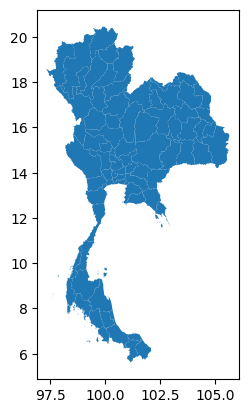

In [43]:
world.plot()

In [44]:
df_year_province.loc[df_year_province['Province']=='angthong']

,Year,Province,total
1,2554,angthong,644
78,2555,angthong,711
155,2556,angthong,735
232,2557,angthong,737
309,2558,angthong,717
386,2559,angthong,767
463,2560,angthong,703
540,2561,angthong,708
617,2562,angthong,712
694,2563,angthong,702


In [45]:
# df_year_province.to_csv('df_year_province.csv')

In [46]:
year_selected = 2557
df_year = df_year_province[df_year_province['Year'] == year_selected]

In [47]:
df_year

,Year,Province,total
231,2557,amnatcharoen,3675
232,2557,angthong,737
233,2557,buengkan,1152
234,2557,buriram,2223
235,2557,chachoengthrao,1270
...,...,...,...
303,2557,udonthani,1720
304,2557,uthaithani,689
305,2557,utradit,1092
306,2557,yala,1656


In [48]:
map_df = world.merge(
    df_year,
    left_on='pro_en',   # ชื่อจังหวัดในแผนที่
    right_on='Province',  # ชื่อจังหวัดใน dataframe
    how='left'
)

<Figure size 1000x1200 with 0 Axes>

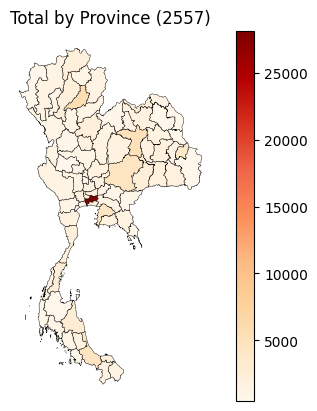

In [49]:
plt.figure(figsize=(10, 12))

map_df.plot(
    column='total',
    cmap='OrRd',      # ไล่สีตามค่า
    legend=True,
    edgecolor='black',
    linewidth=0.3,
    # legend_kwds={'label':f'Total Province in {year_selected}', 'orientation': 'horizontal'}
    
)

plt.title(f'Total by Province ({year_selected})')
plt.axis('off')
plt.show()


In [50]:
map_df

,pro_code,pro_th,pro_en,reg_nesdb,reg_royin,perimeter,area_sqkm,geometry,Year,Province,total
0,56,พะเยา,phayao,UpperNorth,North,442.838839,6189.635950,"MULTIPOLYGON (((100.27194 18.81875, 100.23968 ...",2557,phayao,1105
1,57,เชียงราย,chiangrai,UpperNorth,North,668.416725,11583.012365,"MULTIPOLYGON (((99.53646 19.16314, 99.55039 19...",2557,chiangrai,2156
2,54,แพร่,phrae,UpperNorth,North,515.746817,6484.532497,"MULTIPOLYGON (((99.49711 17.77145, 99.48698 17...",2557,phrae,5667
3,55,น่าน,nan,UpperNorth,North,674.017891,12165.114094,"MULTIPOLYGON (((100.5524 18.03491, 100.55055 1...",2557,nan,1297
4,63,ตาก,tak,LowwerNorth,West,1350.975407,17318.857031,"MULTIPOLYGON (((99.10549 16.0496, 99.08806 16....",2557,tak,1040
...,...,...,...,...,...,...,...,...,...,...,...
72,92,ตรัง,trang,South,South,482.961374,4733.671635,"MULTIPOLYGON (((99.47523 6.97251, 99.47369 6.9...",2557,trang,1088
73,93,พัทลุง,phatthalung,South,South,320.753807,3858.388062,"MULTIPOLYGON (((100.17417 7.17534, 100.16539 7...",2557,phatthalung,1542
74,90,สงขลา,songkhla,South,South,616.307843,7745.412184,"MULTIPOLYGON (((100.975 6.4797, 100.97252 6.46...",2557,songkhla,4486
75,58,แม่ฮ่องสอน,maehongson,UpperNorth,North,962.465841,12784.280567,"MULTIPOLYGON (((98.04746 17.94419, 98.05994 17...",2557,maehongson,534


In [51]:
map_df['pro_th'].unique()

array(['พะเยา', 'เชียงราย', 'แพร่', 'น่าน', 'ตาก', 'สุโขทัย', 'อุทัยธานี',
       'กำแพงเพชร', 'นครสวรรค์', 'เพชรบูรณ์', 'พิษณุโลก', 'พิจิตร',
       'นครราชสีมา', 'บุรีรัมย์', 'สมุทรสาคร', 'สมุทรสงคราม',
       'สุพรรณบุรี', 'นครปฐม', 'ราชบุรี', 'บึงกาฬ', 'กาญจนบุรี',
       'หนองบัวลำภู', 'ลพบุรี', 'ชัยภูมิ', 'สิงห์บุรี', 'พระนครศรีอยุธยา',
       'อำนาจเจริญ', 'อ่างทอง', 'อุบลราชธานี', 'ยโสธร', 'นนทบุรี',
       'สุรินทร์', 'ปทุมธานี', 'กรุงเทพมหานคร', 'ศรีสะเกษ', 'สมุทรปราการ',
       'เพชรบุรี', 'ประจวบคีรีขันธ์', 'อุดรธานี', 'เลย', 'ชลบุรี',
       'ขอนแก่น', 'ระนอง', 'ชุมพร', 'ภูเก็ต', 'สุราษฎร์ธานี', 'กระบี่',
       'มุกดาหาร', 'พังงา', 'สระแก้ว', 'สกลนคร', 'นครศรีธรรมราช',
       'นครพนม', 'ปราจีนบุรี', 'ร้อยเอ็ด', 'นครนายก', 'กาฬสินธุ์', 'ตราด',
       'หนองคาย', 'ฉะเชิงเทรา', 'มหาสารคาม', 'ระยอง', 'จันทบุรี',
       'ชัยนาท', 'สระบุรี', 'ลำปาง', 'อุตรดิตถ์', 'เชียงใหม่', 'ลำพูน',
       'นราธิวาส', 'ปัตตานี', 'ยะลา', 'ตรัง', 'พัทลุง', 'สงขลา',
       'แม่ฮ่องสอน', 'สตูล'], 

In [52]:
map_df['pro_en'].unique()

array(['phayao', 'chiangrai', 'phrae', 'nan', 'tak', 'sukhothai',
       'uthaithani', 'kamphaengphet', 'nakhonsawan', 'phetchabun',
       'phitsanulok', 'phichit', 'nakhonratchasima', 'buriram',
       'samutsakhon', 'samutsongkhram', 'suphanburi', 'nakhonpathom',
       'ratchaburi', 'buengkan', 'kanchanaburi', 'nongbualamphu',
       'lopburi', 'chaiyaphum', 'singburi', 'phranakhonsi-ayutthaya',
       'amnatcharoen', 'angthong', 'ubonratchathani', 'yasothon',
       'nonthaburi', 'surin', 'pathumthani', 'krungthepmahanakhon',
       'sisaket', 'samutprakan', 'phetchaburi', 'prachuapkhirikhan',
       'udonthani', 'loei', 'chonburi', 'khonkaen', 'ranong', 'chumphon',
       'phuket', 'suratthani', 'krabi', 'mukdahan', 'phangnga', 'sakaeo',
       'sakonnakhon', 'nakhonsithammarat', 'nakhonphanom', 'prachinburi',
       'roi-et', 'nakhonnayok', 'kalasin', 'trat', 'nongkhai',
       'chachoengthrao', 'mahasarakham', 'rayong', 'chanthaburi',
       'chainat', 'saraburi', 'lampang', 'u

In [53]:
map_df.loc[map_df['Province']=='angthong']

,pro_code,pro_th,pro_en,reg_nesdb,reg_royin,perimeter,area_sqkm,geometry,Year,Province,total
27,15,อ่างทอง,angthong,Central,Central,160.091467,948.987246,"MULTIPOLYGON (((100.46766 14.44213, 100.46012 ...",2557,angthong,737


In [54]:
df_year_province['Province'].unique()

array(['amnatcharoen', 'angthong', 'buengkan', 'buriram',
       'chachoengthrao', 'chainat', 'chaiyaphum', 'chanthaburi',
       'chiangmai', 'chiangrai', 'chonburi', 'chumphon', 'kalasin',
       'kamphaengphet', 'kanchanaburi', 'khonkaen', 'krabi',
       'krungthepmahanakhon', 'lampang', 'lamphun', 'loei', 'lopburi',
       'maehongson', 'mahasarakham', 'mukdahan', 'nakhonnayok',
       'nakhonpathom', 'nakhonphanom', 'nakhonratchasima', 'nakhonsawan',
       'nakhonsithammarat', 'nan', 'narathiwat', 'nongbualamphu',
       'nongkhai', 'nonthaburi', 'pathumthani', 'pattani', 'phangnga',
       'phatthalung', 'phayao', 'phetchabun', 'phetchaburi', 'phichit',
       'phitsanulok', 'phrae', 'phranakhonsi-ayutthaya', 'phuket',
       'prachinburi', 'prachuapkhirikhan', 'ranong', 'ratchaburi',
       'rayong', 'roi-et', 'sakaeo', 'sakonnakhon', 'samutprakan',
       'samutsakhon', 'samutsongkhram', 'saraburi', 'satun', 'singburi',
       'sisaket', 'songkhla', 'sukhothai', 'suphanburi',

In [55]:
df = pd.read_csv('../2/out.csv')
df_year_province = pd.read_csv('../3/df_year_province.csv')

In [56]:
my_df = df.groupby(['Province', 'Year'])['total beds'].sum().reset_index()
my_df

,Province,Year,total beds
0,Amnat Charoen,2018,655
1,Amnat Charoen,2019,678
2,Amnat Charoen,2020,663
3,Amnat Charoen,2021,687
4,Amnat Charoen,2022,655
...,...,...,...
603,Yasothon,2021,815
604,Yasothon,2022,847
605,Yasothon,2023,845
606,Yasothon,2024,852


In [57]:
my_df['Province'] = my_df['Province'].str.lower().str.replace(' ', '', regex=False)

In [58]:
my_df

,Province,Year,total beds
0,amnatcharoen,2018,655
1,amnatcharoen,2019,678
2,amnatcharoen,2020,663
3,amnatcharoen,2021,687
4,amnatcharoen,2022,655
...,...,...,...
603,yasothon,2021,815
604,yasothon,2022,847
605,yasothon,2023,845
606,yasothon,2024,852


In [59]:
my_df = my_df.loc[(my_df['Province']=='angthong') | (my_df['Province']=='angthong')]
my_df

,Province,Year,total beds
8,angthong,2018,678
9,angthong,2019,661
10,angthong,2020,657
11,angthong,2021,671
12,angthong,2022,658
13,angthong,2023,671
14,angthong,2024,656
15,angthong,2025,654


In [60]:
df_year_province

,Unnamed: 0,Year,Province,total
0,0,2554,amnatcharoen,526
1,1,2554,angthong,644
2,2,2554,buengkan,435
3,3,2554,buriram,1900
4,4,2554,chachoengthrao,1081
...,...,...,...,...
1073,1073,2567,udonthani,3519
1074,1074,2567,uthaithani,755
1075,1075,2567,utradit,1337
1076,1076,2567,yala,1610


In [61]:
year_mapping = {2554:2011, 2555:2012, 2556:2013, 2557:2014, 2558:2015, 2559:2016, 2560:2017, 2561:2018, 2562:2019, 2563:2020, 2564:2021,
       2565:2022, 2566:2023, 2567:2024}
df_year_province['Year'] = df_year_province['Year'].replace(year_mapping)

In [62]:
df_year_province

,Unnamed: 0,Year,Province,total
0,0,2011,amnatcharoen,526
1,1,2011,angthong,644
2,2,2011,buengkan,435
3,3,2011,buriram,1900
4,4,2011,chachoengthrao,1081
...,...,...,...,...
1073,1073,2024,udonthani,3519
1074,1074,2024,uthaithani,755
1075,1075,2024,utradit,1337
1076,1076,2024,yala,1610


In [63]:
df_year_province = df_year_province.loc[(df_year_province['Province']=='angthong') | (df_year_province['Province']=='angthong')].reset_index()
df_year_province

,index,Unnamed: 0,Year,Province,total
0,1,1,2011,angthong,644
1,78,78,2012,angthong,711
2,155,155,2013,angthong,735
3,232,232,2014,angthong,737
4,309,309,2015,angthong,717
5,386,386,2016,angthong,767
6,463,463,2017,angthong,703
7,540,540,2018,angthong,708
8,617,617,2019,angthong,712
9,694,694,2020,angthong,702


In [64]:
my_df

,Province,Year,total beds
8,angthong,2018,678
9,angthong,2019,661
10,angthong,2020,657
11,angthong,2021,671
12,angthong,2022,658
13,angthong,2023,671
14,angthong,2024,656
15,angthong,2025,654


In [65]:
df_all = pd.merge(
    my_df,
    df_year_province,
    on=['Year', 'Province'],
    how='left'   # เหมือน LEFT JOIN
)
df_all

,Province,Year,total beds,index,Unnamed: 0,total
0,angthong,2018,678,540.0,540.0,708.0
1,angthong,2019,661,617.0,617.0,712.0
2,angthong,2020,657,694.0,694.0,702.0
3,angthong,2021,671,771.0,771.0,714.0
4,angthong,2022,658,848.0,848.0,709.0
5,angthong,2023,671,925.0,925.0,707.0
6,angthong,2024,656,1002.0,1002.0,712.0
7,angthong,2025,654,NaN,NaN,NaN


### Test

In [66]:
df = pd.read_csv('./1.csv')

In [67]:
df_year_province = pd.read_csv('../3/df_year_province.csv')

In [68]:
df_year_province = (
    df.groupby(['ปี', 'จังหวัด'])['จำนวน']
    .sum()
    .reset_index()
)

In [69]:
df_year_province

,ปี,จังหวัด,จำนวน
0,2554,กระบี่,647
1,2554,กรุงเทพมหานคร,22133
2,2554,กาญจนบุรี,1196
3,2554,กาฬสินธุ์,1216
4,2554,กำแพงเพชร,825
...,...,...,...
1073,2567,เพชรบุรี,1155
1074,2567,เพชรบูรณ์,1742
1075,2567,เลย,1488
1076,2567,แพร่,1185


In [70]:
province_mapping = {
    'กระบี่':'krabi', 'กรุงเทพมหานคร':'bangkok', 'กาญจนบุรี':'kanchanaburi', 'กาฬสินธุ์':'kalasin', 'กำแพงเพชร':'kamphaengphet', 'ขอนแก่น':'khonkaen',
 'จันทบุรี':'chanthaburi', 'ฉะเชิงเทรา':'chachoengthrao', 'ชลบุรี':'chonburi', 'ชัยนาท':'chainat', 'ชัยภูมิ':'chaiyaphum', 'ชุมพร':'chumphon', 'ตรัง':'trang', 'ตราด':'trat',
 'ตาก':'tak', 'นครนายก':'nakhonnayok', 'นครปฐม':'nakhonpathom', 'นครพนม':'nakhonphanom', 'นครราชสีมา':'nakhonratchasima', 'นครศรีธรรมราช':'nakhonsithammarat',
 'นครสวรรค์':'nakhonsawan', 'นนทบุรี':'nonthaburi', 'นราธิวาส':'narathiwat', 'น่าน':'nan', 'บึงกาฬ':'buengkan', 'บุรีรัมย์':'buriram', 'ปทุมธานี':'pathumthani',
 'ประจวบคีรีขันธ์':'prachuapkhirikhan', 'ปราจีนบุรี':'prachinburi', 'ปัตตานี':'pattani', 'พระนครศรีอยุธยา':'phranakhonsi-ayutthaya', 'พะเยา':'phayao',
 'พังงา':'phangnga', 'พัทลุง':'phatthalung', 'พิจิตร':'phichit', 'พิษณุโลก':'phitsanulok', 'ภูเก็ต':'phuket', 'มหาสารคาม':'mahasarakham', 'มุกดาหาร':'mukdahan',
 'ยะลา':'yala', 'ยโสธร':'yasothon', 'ระนอง':'ranong', 'ระยอง':'rayong', 'ราชบุรี':'ratchaburi', 'ร้อยเอ็ด':'roi-et', 'ลพบุรี':'lopburi', 'ลำปาง':'lampang',
 'ลำพูน':'lamphun', 'ศรีสะเกษ':'sisaket', 'สกลนคร':'sakonnakhon', 'สงขลา':'songkhla', 'สตูล':'satun', 'สมุทรปราการ':'samutprakan', 'สมุทรสงคราม':'samutsongkhram',
 'สมุทรสาคร':'samutsakhon', 'สระบุรี':'saraburi', 'สระแก้ว':'sakaeo', 'สิงห์บุรี':'singburi', 'สุพรรณบุรี':'suphanburi', 'สุราษฎร์ธานี':'suratthani',
 'สุรินทร์':'surin', 'สุโขทัย':'sukhothai', 'หนองคาย':'nongkhai', 'หนองบัวลำภู':'nongbualamphu', 'อำนาจเจริญ':'amnatcharoen', 'อุดรธานี':'udonthani',
 'อุตรดิตถ์':'utradit', 'อุทัยธานี':'uthaithani', 'อุบลราชธานี':'ubonratchathani', 'อ่างทอง':'Angthong', 'เชียงราย':'chiangrai', 'เชียงใหม่':'chiangmai',
 'เพชรบุรี':'phetchaburi', 'เพชรบูรณ์':'phetchabun', 'เลย':'loei', 'แพร่':'phrae', 'แม่ฮ่องสอน':'maehongson'
}

In [71]:
df_year_province['province_en'] = df_year_province['จังหวัด'].map(province_mapping)
df_year_province

,ปี,จังหวัด,จำนวน,province_en
0,2554,กระบี่,647,krabi
1,2554,กรุงเทพมหานคร,22133,bangkok
2,2554,กาญจนบุรี,1196,kanchanaburi
3,2554,กาฬสินธุ์,1216,kalasin
4,2554,กำแพงเพชร,825,kamphaengphet
...,...,...,...,...
1073,2567,เพชรบุรี,1155,phetchaburi
1074,2567,เพชรบูรณ์,1742,phetchabun
1075,2567,เลย,1488,loei
1076,2567,แพร่,1185,phrae


In [72]:
df_year_province['province_en'].unique()

array(['krabi', 'bangkok', 'kanchanaburi', 'kalasin', 'kamphaengphet',
       'khonkaen', 'chanthaburi', 'chachoengthrao', 'chonburi', 'chainat',
       'chaiyaphum', 'chumphon', 'trang', 'trat', 'tak', 'nakhonnayok',
       'nakhonpathom', 'nakhonphanom', 'nakhonratchasima',
       'nakhonsithammarat', 'nakhonsawan', 'nonthaburi', 'narathiwat',
       'nan', 'buengkan', 'buriram', 'pathumthani', 'prachuapkhirikhan',
       'prachinburi', 'pattani', 'phranakhonsi-ayutthaya', 'phayao',
       'phangnga', 'phatthalung', 'phichit', 'phitsanulok', 'phuket',
       'mahasarakham', 'mukdahan', 'yala', 'yasothon', 'ranong', 'rayong',
       'ratchaburi', 'roi-et', 'lopburi', 'lampang', 'lamphun', 'sisaket',
       'sakonnakhon', 'songkhla', 'satun', 'samutprakan',
       'samutsongkhram', 'samutsakhon', 'saraburi', 'sakaeo', 'singburi',
       'suphanburi', 'suratthani', 'surin', 'sukhothai', 'nongkhai',
       'nongbualamphu', 'amnatcharoen', 'udonthani', 'utradit',
       'uthaithani', 'ubo

In [73]:
import geopandas as gpd
world = gpd.read_file('../3/provinces.geojson')

In [74]:
world

,pro_code,pro_th,pro_en,reg_nesdb,reg_royin,perimeter,area_sqkm,geometry
0,56,พะเยา,Phayao,UpperNorth,North,442.838839,6189.635950,"MULTIPOLYGON (((100.27194 18.81875, 100.23968 ..."
1,57,เชียงราย,Chiang Rai,UpperNorth,North,668.416725,11583.012365,"MULTIPOLYGON (((99.53646 19.16314, 99.55039 19..."
2,54,แพร่,Phrae,UpperNorth,North,515.746817,6484.532497,"MULTIPOLYGON (((99.49711 17.77145, 99.48698 17..."
3,55,น่าน,Nan,UpperNorth,North,674.017891,12165.114094,"MULTIPOLYGON (((100.5524 18.03491, 100.55055 1..."
4,63,ตาก,Tak,LowwerNorth,West,1350.975407,17318.857031,"MULTIPOLYGON (((99.10549 16.0496, 99.08806 16...."
...,...,...,...,...,...,...,...,...
72,92,ตรัง,Trang,South,South,482.961374,4733.671635,"MULTIPOLYGON (((99.47523 6.97251, 99.47369 6.9..."
73,93,พัทลุง,Phatthalung,South,South,320.753807,3858.388062,"MULTIPOLYGON (((100.17417 7.17534, 100.16539 7..."
74,90,สงขลา,Songkhla,South,South,616.307843,7745.412184,"MULTIPOLYGON (((100.975 6.4797, 100.97252 6.46..."
75,58,แม่ฮ่องสอน,Mae Hong Son,UpperNorth,North,962.465841,12784.280567,"MULTIPOLYGON (((98.04746 17.94419, 98.05994 17..."


In [75]:
world['pro_en'].unique()

array(['Phayao', 'Chiang Rai', 'Phrae', 'Nan', 'Tak', 'Sukhothai',
       'Uthai Thani', 'Kamphaeng Phet', 'Nakhon Sawan', 'Phetchabun',
       'Phitsanulok', 'Phichit', 'Nakhon Ratchasima', 'Buriram',
       'Samut Sakhon', 'Samut Songkhram', 'Suphan Buri', 'Nakhon Pathom',
       'Ratchaburi', 'Bueng Kan', 'Kanchanaburi', 'Nong Bua Lamphu',
       'Lopburi', 'Chaiyaphum', 'Sing Buri', 'Phra Nakhon Si Ayutthaya',
       'Amnat Charoen', 'Ang Thong', 'Ubon Ratchathani', 'Yasothon',
       'Nonthaburi', 'Surin', 'Pathum Thani', 'Bangkok', 'Sisaket',
       'Samut Prakan', 'Phetchaburi', 'Prachuap Khiri Khan', 'Udon Thani',
       'Loei', 'Chonburi', 'Khon Kaen', 'Ranong', 'Chumphon', 'Phuket',
       'Surat Thani', 'Krabi', 'Mukdahan', 'Phang Nga', 'Sa Kaeo',
       'Sakon Nakhon', 'Nakhon Si Thammarat', 'Nakhon Phanom',
       'Prachin Buri', 'Roi Et', 'Nakhon Nayok', 'Kalasin', 'Trat',
       'Nong Khai', 'Chachoengsao', 'Maha Sarakham', 'Rayong',
       'Chanthaburi', 'Chainat', 'Sar

In [76]:
df_year_province.loc[df_year_province['province_en']=='nan']

,ปี,จังหวัด,จำนวน,province_en
23,2554,น่าน,1064,nan
100,2555,น่าน,1080,nan
177,2556,น่าน,936,nan
254,2557,น่าน,1297,nan
331,2558,น่าน,1207,nan
408,2559,น่าน,1241,nan
485,2560,น่าน,1253,nan
562,2561,น่าน,1252,nan
639,2562,น่าน,1258,nan
716,2563,น่าน,1236,nan


In [77]:
world['pro_en'] = world['pro_en'].str.strip().str.lower()
world

,pro_code,pro_th,pro_en,reg_nesdb,reg_royin,perimeter,area_sqkm,geometry
0,56,พะเยา,phayao,UpperNorth,North,442.838839,6189.635950,"MULTIPOLYGON (((100.27194 18.81875, 100.23968 ..."
1,57,เชียงราย,chiang rai,UpperNorth,North,668.416725,11583.012365,"MULTIPOLYGON (((99.53646 19.16314, 99.55039 19..."
2,54,แพร่,phrae,UpperNorth,North,515.746817,6484.532497,"MULTIPOLYGON (((99.49711 17.77145, 99.48698 17..."
3,55,น่าน,nan,UpperNorth,North,674.017891,12165.114094,"MULTIPOLYGON (((100.5524 18.03491, 100.55055 1..."
4,63,ตาก,tak,LowwerNorth,West,1350.975407,17318.857031,"MULTIPOLYGON (((99.10549 16.0496, 99.08806 16...."
...,...,...,...,...,...,...,...,...
72,92,ตรัง,trang,South,South,482.961374,4733.671635,"MULTIPOLYGON (((99.47523 6.97251, 99.47369 6.9..."
73,93,พัทลุง,phatthalung,South,South,320.753807,3858.388062,"MULTIPOLYGON (((100.17417 7.17534, 100.16539 7..."
74,90,สงขลา,songkhla,South,South,616.307843,7745.412184,"MULTIPOLYGON (((100.975 6.4797, 100.97252 6.46..."
75,58,แม่ฮ่องสอน,mae hong son,UpperNorth,North,962.465841,12784.280567,"MULTIPOLYGON (((98.04746 17.94419, 98.05994 17..."


In [78]:
world['pro_en'].unique()

array(['phayao', 'chiang rai', 'phrae', 'nan', 'tak', 'sukhothai',
       'uthai thani', 'kamphaeng phet', 'nakhon sawan', 'phetchabun',
       'phitsanulok', 'phichit', 'nakhon ratchasima', 'buriram',
       'samut sakhon', 'samut songkhram', 'suphan buri', 'nakhon pathom',
       'ratchaburi', 'bueng kan', 'kanchanaburi', 'nong bua lamphu',
       'lopburi', 'chaiyaphum', 'sing buri', 'phra nakhon si ayutthaya',
       'amnat charoen', 'ang thong', 'ubon ratchathani', 'yasothon',
       'nonthaburi', 'surin', 'pathum thani', 'bangkok', 'sisaket',
       'samut prakan', 'phetchaburi', 'prachuap khiri khan', 'udon thani',
       'loei', 'chonburi', 'khon kaen', 'ranong', 'chumphon', 'phuket',
       'surat thani', 'krabi', 'mukdahan', 'phang nga', 'sa kaeo',
       'sakon nakhon', 'nakhon si thammarat', 'nakhon phanom',
       'prachin buri', 'roi et', 'nakhon nayok', 'kalasin', 'trat',
       'nong khai', 'chachoengsao', 'maha sarakham', 'rayong',
       'chanthaburi', 'chainat', 'sar

In [79]:
world['pro_en'].unique()

array(['phayao', 'chiang rai', 'phrae', 'nan', 'tak', 'sukhothai',
       'uthai thani', 'kamphaeng phet', 'nakhon sawan', 'phetchabun',
       'phitsanulok', 'phichit', 'nakhon ratchasima', 'buriram',
       'samut sakhon', 'samut songkhram', 'suphan buri', 'nakhon pathom',
       'ratchaburi', 'bueng kan', 'kanchanaburi', 'nong bua lamphu',
       'lopburi', 'chaiyaphum', 'sing buri', 'phra nakhon si ayutthaya',
       'amnat charoen', 'ang thong', 'ubon ratchathani', 'yasothon',
       'nonthaburi', 'surin', 'pathum thani', 'bangkok', 'sisaket',
       'samut prakan', 'phetchaburi', 'prachuap khiri khan', 'udon thani',
       'loei', 'chonburi', 'khon kaen', 'ranong', 'chumphon', 'phuket',
       'surat thani', 'krabi', 'mukdahan', 'phang nga', 'sa kaeo',
       'sakon nakhon', 'nakhon si thammarat', 'nakhon phanom',
       'prachin buri', 'roi et', 'nakhon nayok', 'kalasin', 'trat',
       'nong khai', 'chachoengsao', 'maha sarakham', 'rayong',
       'chanthaburi', 'chainat', 'sar

In [80]:
world['pro_en'] = [province.replace(' ', '') for province in world['pro_en']]

In [81]:
world['pro_en'].unique()

array(['phayao', 'chiangrai', 'phrae', 'nan', 'tak', 'sukhothai',
       'uthaithani', 'kamphaengphet', 'nakhonsawan', 'phetchabun',
       'phitsanulok', 'phichit', 'nakhonratchasima', 'buriram',
       'samutsakhon', 'samutsongkhram', 'suphanburi', 'nakhonpathom',
       'ratchaburi', 'buengkan', 'kanchanaburi', 'nongbualamphu',
       'lopburi', 'chaiyaphum', 'singburi', 'phranakhonsiayutthaya',
       'amnatcharoen', 'angthong', 'ubonratchathani', 'yasothon',
       'nonthaburi', 'surin', 'pathumthani', 'bangkok', 'sisaket',
       'samutprakan', 'phetchaburi', 'prachuapkhirikhan', 'udonthani',
       'loei', 'chonburi', 'khonkaen', 'ranong', 'chumphon', 'phuket',
       'suratthani', 'krabi', 'mukdahan', 'phangnga', 'sakaeo',
       'sakonnakhon', 'nakhonsithammarat', 'nakhonphanom', 'prachinburi',
       'roiet', 'nakhonnayok', 'kalasin', 'trat', 'nongkhai',
       'chachoengsao', 'mahasarakham', 'rayong', 'chanthaburi', 'chainat',
       'saraburi', 'lampang', 'uttaradit', 'chia

In [82]:
df_year_province['province_en'].unique()

array(['krabi', 'bangkok', 'kanchanaburi', 'kalasin', 'kamphaengphet',
       'khonkaen', 'chanthaburi', 'chachoengthrao', 'chonburi', 'chainat',
       'chaiyaphum', 'chumphon', 'trang', 'trat', 'tak', 'nakhonnayok',
       'nakhonpathom', 'nakhonphanom', 'nakhonratchasima',
       'nakhonsithammarat', 'nakhonsawan', 'nonthaburi', 'narathiwat',
       'nan', 'buengkan', 'buriram', 'pathumthani', 'prachuapkhirikhan',
       'prachinburi', 'pattani', 'phranakhonsi-ayutthaya', 'phayao',
       'phangnga', 'phatthalung', 'phichit', 'phitsanulok', 'phuket',
       'mahasarakham', 'mukdahan', 'yala', 'yasothon', 'ranong', 'rayong',
       'ratchaburi', 'roi-et', 'lopburi', 'lampang', 'lamphun', 'sisaket',
       'sakonnakhon', 'songkhla', 'satun', 'samutprakan',
       'samutsongkhram', 'samutsakhon', 'saraburi', 'sakaeo', 'singburi',
       'suphanburi', 'suratthani', 'surin', 'sukhothai', 'nongkhai',
       'nongbualamphu', 'amnatcharoen', 'udonthani', 'utradit',
       'uthaithani', 'ubo

In [83]:
for item in world['pro_en'].unique():
    if item not in df_year_province['province_en'].unique():
        print(item)

phranakhonsiayutthaya
angthong
roiet
chachoengsao
uttaradit


In [84]:
# เปลี่ยน ให้ df_year_province['province_en'] ให้ตรงกับ world['pro_en'] เพื่อเพิ่ม column ชื่อ area_sqkm ใน df_year_province
change_df_year_province_to_world_mapping = {'phranakhonsi-ayutthaya':'phranakhonsiayutthaya',
                                            'Angthong':'angthong',
                                            'roi-et':'roiet',
                                            'chachoengthrao':'chachoengsao',
                                            'utradit':'uttaradit'}

df_year_province['province_en'] = df_year_province['province_en'].replace(change_df_year_province_to_world_mapping)
df_year_province

,ปี,จังหวัด,จำนวน,province_en
0,2554,กระบี่,647,krabi
1,2554,กรุงเทพมหานคร,22133,bangkok
2,2554,กาญจนบุรี,1196,kanchanaburi
3,2554,กาฬสินธุ์,1216,kalasin
4,2554,กำแพงเพชร,825,kamphaengphet
...,...,...,...,...
1073,2567,เพชรบุรี,1155,phetchaburi
1074,2567,เพชรบูรณ์,1742,phetchabun
1075,2567,เลย,1488,loei
1076,2567,แพร่,1185,phrae


In [85]:
for i, province in enumerate(df_year_province['province_en']):
    # print(province)
    for temp_value in world['pro_en']:
        if province == temp_value:
            # df_year_province['area_sqkm'][i] = world.loc[world['pro_en']==province]['area_sqkm']
            # df_year_province.loc[i, "area_sqkm"] = world.loc[world['pro_en']==province]['area_sqkm']
            df_year_province.loc[i, "area_sqkm"] = world.loc[world['pro_en']==province, 'area_sqkm'].values[0]
            # print(world.loc[world['pro_en']==province]['area_sqkm'].values)
            # print(world.loc[world['pro_en']==province]['area_sqkm'].values[0])

In [86]:
df_year_province['province_en'].unique()

array(['krabi', 'bangkok', 'kanchanaburi', 'kalasin', 'kamphaengphet',
       'khonkaen', 'chanthaburi', 'chachoengsao', 'chonburi', 'chainat',
       'chaiyaphum', 'chumphon', 'trang', 'trat', 'tak', 'nakhonnayok',
       'nakhonpathom', 'nakhonphanom', 'nakhonratchasima',
       'nakhonsithammarat', 'nakhonsawan', 'nonthaburi', 'narathiwat',
       'nan', 'buengkan', 'buriram', 'pathumthani', 'prachuapkhirikhan',
       'prachinburi', 'pattani', 'phranakhonsiayutthaya', 'phayao',
       'phangnga', 'phatthalung', 'phichit', 'phitsanulok', 'phuket',
       'mahasarakham', 'mukdahan', 'yala', 'yasothon', 'ranong', 'rayong',
       'ratchaburi', 'roiet', 'lopburi', 'lampang', 'lamphun', 'sisaket',
       'sakonnakhon', 'songkhla', 'satun', 'samutprakan',
       'samutsongkhram', 'samutsakhon', 'saraburi', 'sakaeo', 'singburi',
       'suphanburi', 'suratthani', 'surin', 'sukhothai', 'nongkhai',
       'nongbualamphu', 'amnatcharoen', 'udonthani', 'uttaradit',
       'uthaithani', 'ubonr

In [87]:
world['pro_en'].unique()

array(['phayao', 'chiangrai', 'phrae', 'nan', 'tak', 'sukhothai',
       'uthaithani', 'kamphaengphet', 'nakhonsawan', 'phetchabun',
       'phitsanulok', 'phichit', 'nakhonratchasima', 'buriram',
       'samutsakhon', 'samutsongkhram', 'suphanburi', 'nakhonpathom',
       'ratchaburi', 'buengkan', 'kanchanaburi', 'nongbualamphu',
       'lopburi', 'chaiyaphum', 'singburi', 'phranakhonsiayutthaya',
       'amnatcharoen', 'angthong', 'ubonratchathani', 'yasothon',
       'nonthaburi', 'surin', 'pathumthani', 'bangkok', 'sisaket',
       'samutprakan', 'phetchaburi', 'prachuapkhirikhan', 'udonthani',
       'loei', 'chonburi', 'khonkaen', 'ranong', 'chumphon', 'phuket',
       'suratthani', 'krabi', 'mukdahan', 'phangnga', 'sakaeo',
       'sakonnakhon', 'nakhonsithammarat', 'nakhonphanom', 'prachinburi',
       'roiet', 'nakhonnayok', 'kalasin', 'trat', 'nongkhai',
       'chachoengsao', 'mahasarakham', 'rayong', 'chanthaburi', 'chainat',
       'saraburi', 'lampang', 'uttaradit', 'chia

In [88]:
world.loc[world['pro_en']=='phrae']

,pro_code,pro_th,pro_en,reg_nesdb,reg_royin,perimeter,area_sqkm,geometry
2,54,แพร่,phrae,UpperNorth,North,515.746817,6484.532497,"MULTIPOLYGON (((99.49711 17.77145, 99.48698 17..."


In [89]:
df_year_province

,ปี,จังหวัด,จำนวน,province_en,area_sqkm
0,2554,กระบี่,647,krabi,5319.415247
1,2554,กรุงเทพมหานคร,22133,bangkok,1566.577855
2,2554,กาญจนบุรี,1196,kanchanaburi,19405.042979
3,2554,กาฬสินธุ์,1216,kalasin,6898.983456
4,2554,กำแพงเพชร,825,kamphaengphet,8520.494768
...,...,...,...,...,...
1073,2567,เพชรบุรี,1155,phetchaburi,6173.001739
1074,2567,เพชรบูรณ์,1742,phetchabun,12333.156079
1075,2567,เลย,1488,loei,10490.079232
1076,2567,แพร่,1185,phrae,6484.532497


In [ ]:
# df_year_province.to_csv('df_year_province2.csv')

In [91]:
df_year = df_year_province[df_year_province['ปี'] == 2556]
df_year

,ปี,จังหวัด,จำนวน,province_en,area_sqkm
154,2556,กระบี่,584,krabi,5319.415247
155,2556,กรุงเทพมหานคร,23680,bangkok,1566.577855
156,2556,กาญจนบุรี,1148,kanchanaburi,19405.042979
157,2556,กาฬสินธุ์,1401,kalasin,6898.983456
158,2556,กำแพงเพชร,788,kamphaengphet,8520.494768
...,...,...,...,...,...
226,2556,เพชรบุรี,936,phetchaburi,6173.001739
227,2556,เพชรบูรณ์,1008,phetchabun,12333.156079
228,2556,เลย,1078,loei,10490.079232
229,2556,แพร่,923,phrae,6484.532497


In [ ]:
# df_year['density'] = df_year['จำนวน'] / df_year['area_sqkm']
df_year.loc[:, 'density'] = df_year['จำนวน'] / df_year['area_sqkm']

In [ ]:
df_year

In [ ]:
df_year['density']

In [ ]:
df_year.to_csv('visualize1.csv')